In [2]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
df2 = pd.read_csv('Final2.csv',parse_dates=['epoch'], index_col='epoch')
# df = df[::8]
# df2 = pd.read_csv('FinalExplorer7.csv', parse_dates=['epoch'], index_col='epoch')

df2.head()

,Unnamed: 0,Position Vector(X),Position Vector(Y),Position Vector(Z),Velocity Vector(X),Velocity Vector(Y),Velocity Vector(Z)
epoch,,,,,,,
1998-01-01 01:31:37.643232,0,539.966799,-2402.884922,6712.378662,3.423181e-07,-1.390035e-06,-5.251387e-07
1998-01-02 04:19:05.685888,1,-4218.586265,3059.284034,4895.461537,-8.602157e-07,6.058464e-07,-1.119883e-06
1998-01-03 03:45:37.776672,2,2156.238755,-6372.965462,2419.938816,1.774628e-07,-4.917258e-07,-1.453094e-06
1998-01-03 13:48:25.803360,3,6579.004214,-2524.466269,1209.418802,2.477344e-07,-8.480115e-08,-1.524631e-06
1998-01-04 03:12:09.794016,4,6018.406134,3833.386731,-449.631531,-8.729159e-08,-4.436557e-08,-1.546672e-06


In [3]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,15337.0,7.668000e+03,4.427555e+03,0.000000,3.834000e+03,7.668000e+03,1.150200e+04,15336.000000
Position Vector(X),15337.0,-5.636759e+01,3.603959e+03,-7150.747238,-2.641182e+03,-2.347959e+01,2.467211e+03,7153.070358
Position Vector(Y),15337.0,-4.214787e+01,3.556121e+03,-7153.254690,-2.575907e+03,-5.291724e+01,2.448617e+03,7153.032421
Position Vector(Z),15337.0,-2.941546e+01,5.053021e+03,-7154.475983,-5.047110e+03,-5.409558e+01,5.048709e+03,7153.892544
Velocity Vector(X),15337.0,8.102697e-10,7.692271e-07,-0.000002,-4.889648e-07,1.450092e-09,4.849730e-07,0.000002
Velocity Vector(Y),15337.0,-1.404403e-09,7.691538e-07,-0.000002,-4.865700e-07,3.749150e-10,4.816887e-07,0.000002
Velocity Vector(Z),15337.0,1.630962e-09,1.089884e-06,-0.000002,-1.012357e-06,7.313433e-09,1.021869e-06,0.000002


,Unnamed: 0,Position Vector(X),Position Vector(Y),Position Vector(Z),Velocity Vector(X),Velocity Vector(Y),Velocity Vector(Z)
epoch,,,,,,,
1998-01-01,0.0,539.966799,-2402.884922,6712.378662,3.423181e-07,-1.390035e-06,-5.251387e-07
1998-01-02,1.0,-4218.586265,3059.284034,4895.461537,-8.602157e-07,6.058464e-07,-1.119883e-06
1998-01-03,2.5,4367.621485,-4448.715866,1814.678809,2.125986e-07,-2.882635e-07,-1.488862e-06
1998-01-04,4.0,6018.406134,3833.386731,-449.631531,-8.729159e-08,-4.436557e-08,-1.546672e-06
1998-01-05,5.0,-6009.279279,-1797.134298,-3431.668472,7.196183e-07,2.042660e-07,-1.367115e-06


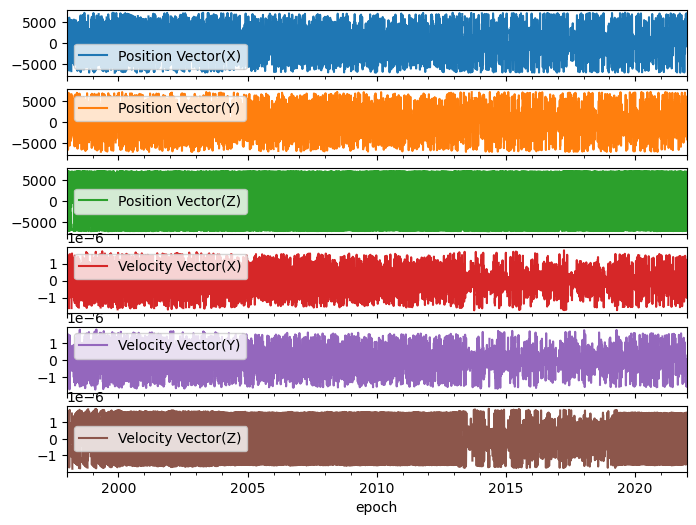

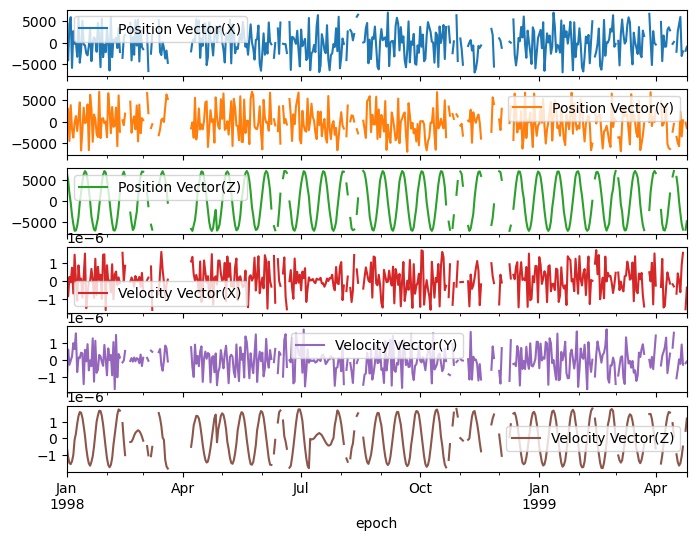

In [4]:
# df_resampled = df2.interpolate(method='time')
df_resampled = df2.resample('D').mean()
# uni_data = df_resampled[['Position Vector(X)', 'Position Vector(Y)', 'Position Vector(Z)', 'Velocity Vector(X)', 'Velocity Vector(Y)', 'Velocity Vector(Z)']].copy()
# uni_data.index = df_resampled.index

plot_cols = ['Position Vector(X)', 'Position Vector(Y)', 'Position Vector(Z)', 'Velocity Vector(X)', 'Velocity Vector(Y)', 'Velocity Vector(Z)']
plot_features = df_resampled[plot_cols]
plot_features.index = df_resampled.index
_ = plot_features.plot(subplots=True)

plot_features = df_resampled[plot_cols][:480]
plot_features.index = df_resampled.index[:480]
_ = plot_features.plot(subplots=True)


df_resampled.head()


,Unnamed: 0,Position Vector(X),Position Vector(Y),Position Vector(Z),Velocity Vector(X),Velocity Vector(Y),Velocity Vector(Z)
epoch,,,,,,,
1998-01-01,0.0,539.966799,-2402.884922,6712.378662,3.423181e-07,-1.390035e-06,-5.251387e-07
1998-01-02,1.0,-4218.586265,3059.284034,4895.461537,-8.602157e-07,6.058464e-07,-1.119883e-06
1998-01-03,2.5,4367.621485,-4448.715866,1814.678809,2.125986e-07,-2.882635e-07,-1.488862e-06
1998-01-04,4.0,6018.406134,3833.386731,-449.631531,-8.729159e-08,-4.436557e-08,-1.546672e-06
1998-01-05,5.0,-6009.279279,-1797.134298,-3431.668472,7.196183e-07,2.042660e-07,-1.367115e-06


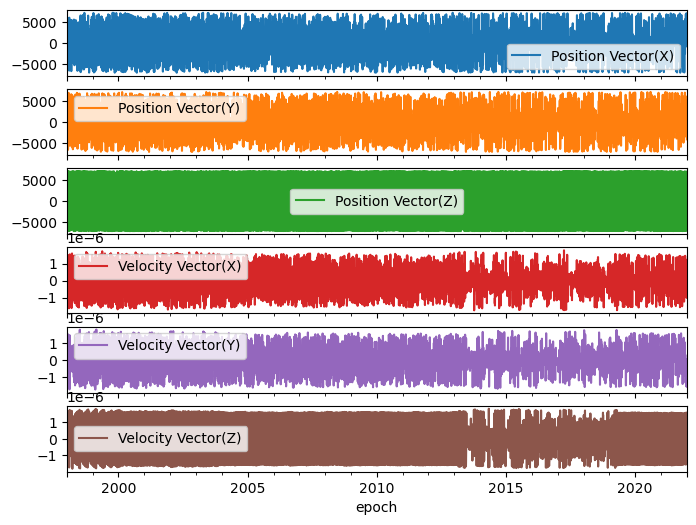

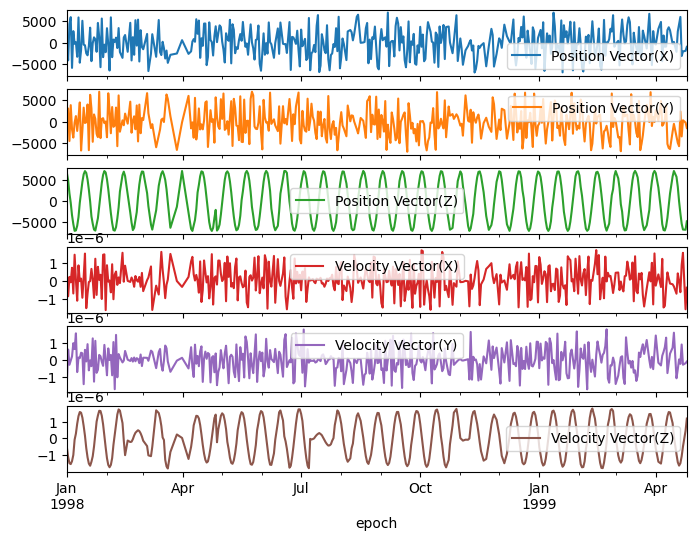

In [5]:
df_resampled = df_resampled.interpolate(method='time')
plot_cols = ['Position Vector(X)', 'Position Vector(Y)', 'Position Vector(Z)', 'Velocity Vector(X)', 'Velocity Vector(Y)', 'Velocity Vector(Z)']
plot_features = df_resampled[plot_cols]
plot_features.index = df_resampled.index
_ = plot_features.plot(subplots=True)

plot_features = df_resampled[plot_cols][:480]
plot_features.index = df_resampled.index[:480]
_ = plot_features.plot(subplots=True)

df_resampled.head()

In [6]:
df_resampled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8767.0,7.231822e+03,4.563400e+03,0.000000,2.927250e+03,7.329000e+03,1.099250e+04,15336.000000
Position Vector(X),8767.0,-5.002991e+01,3.369311e+03,-7137.237650,-2.337524e+03,-1.199429e+01,2.175670e+03,7153.070358
Position Vector(Y),8767.0,-4.026753e+01,3.294777e+03,-7150.582884,-2.265605e+03,-4.711935e+01,2.090950e+03,7150.059950
Position Vector(Z),8767.0,-2.240076e+01,5.031079e+03,-7154.475983,-5.014365e+03,-4.326109e+01,5.014820e+03,7153.892544
Velocity Vector(X),8767.0,2.496535e-09,7.070953e-07,-0.000002,-4.429099e-07,2.912793e-10,4.424459e-07,0.000002
Velocity Vector(Y),8767.0,-5.827245e-09,7.008908e-07,-0.000002,-4.362575e-07,1.212300e-09,4.280175e-07,0.000002
Velocity Vector(Z),8767.0,5.788375e-09,1.072371e-06,-0.000002,-9.942580e-07,2.063133e-08,9.956970e-07,0.000002


In [7]:
date_time = pd.to_datetime(df_resampled.index)

In [8]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)

Frequency peak: 1.97 1/month


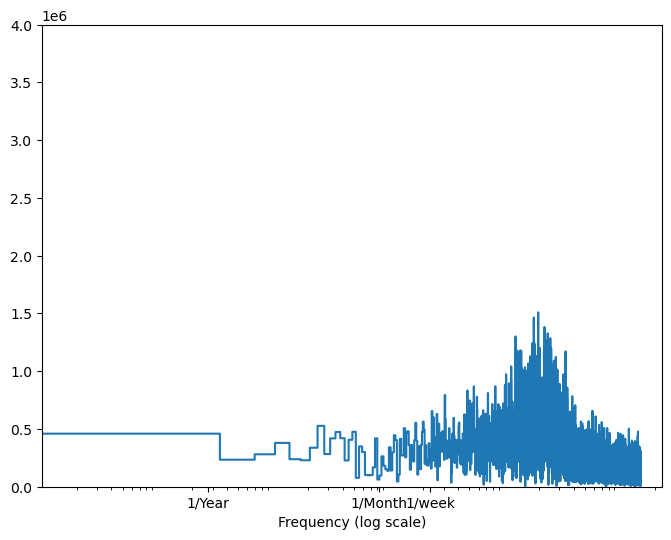

In [9]:

fft = tf.signal.rfft(df_resampled['Position Vector(X)'])

f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Position Vector(X)'])
days_per_year = 365.2524
years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle
f_per_week = f_per_month / 4.3482
plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4000000)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
# f_peak = f_per_month[max_index]

# print("Frequency peak: {:.2f} 1/month".format(f_peak))
max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_posx = f_per_month[max_index]

print("Frequency peak: {:.2f} 1/month".format(f_peak_posx))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))
# peaks, _ = scipy.signal.find_peaks(np.abs(fft))



Frequency peak: 2.09 1/month


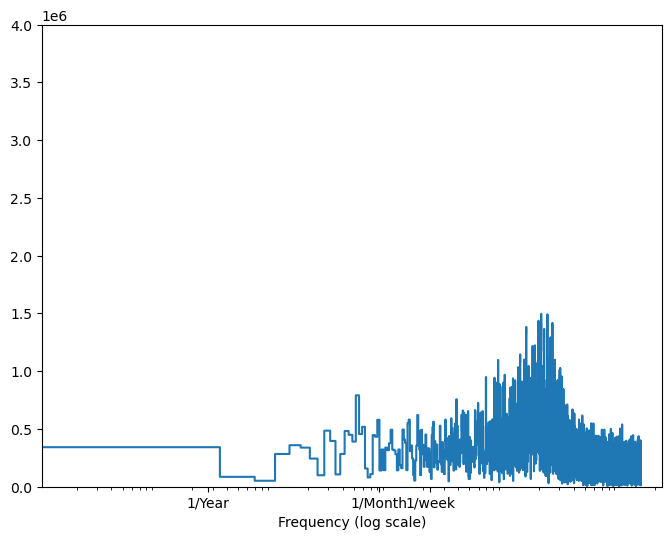

In [10]:
fft = tf.signal.rfft(df_resampled['Position Vector(Y)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Position Vector(Y)'])
days_per_year = 365.2524

years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle

plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 4000000)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# # Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_posy = f_per_month[max_index]

print("Frequency peak: {:.2f} 1/month".format(f_peak_posy))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))

Frequency peak: 2.01 1/month


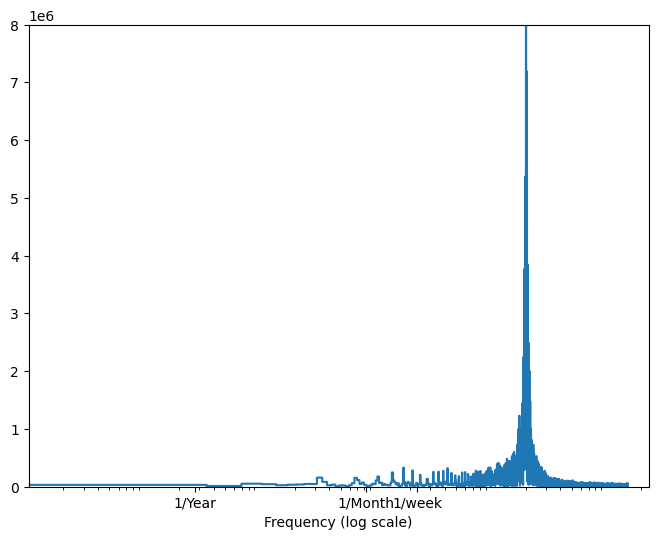

In [11]:
fft = tf.signal.rfft(df_resampled['Position Vector(Z)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Position Vector(Z)'])
days_per_year = 365.2524

years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle
f_per_week = f_per_month / 4.285

plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 8000000)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# # Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_posz = f_per_month[max_index]

print("Frequency peak: {:.2f} 1/month".format(f_peak_posz))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))

Frequency peak: 1.808833318 1/month


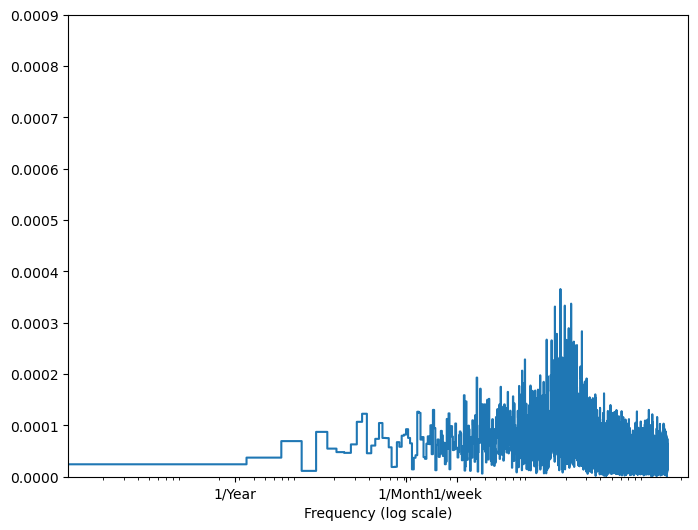

In [14]:
fft = tf.signal.rfft(df_resampled['Velocity Vector(X)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Velocity Vector(X)'])
days_per_year = 365.2524

years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle
f_per_week = f_per_month / 4.285

plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 0.0009)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_velx = f_per_month[max_index]

print("Frequency peak: {:.9f} 1/month".format(f_peak_velx))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))

Frequency peak: 1.81 1/month


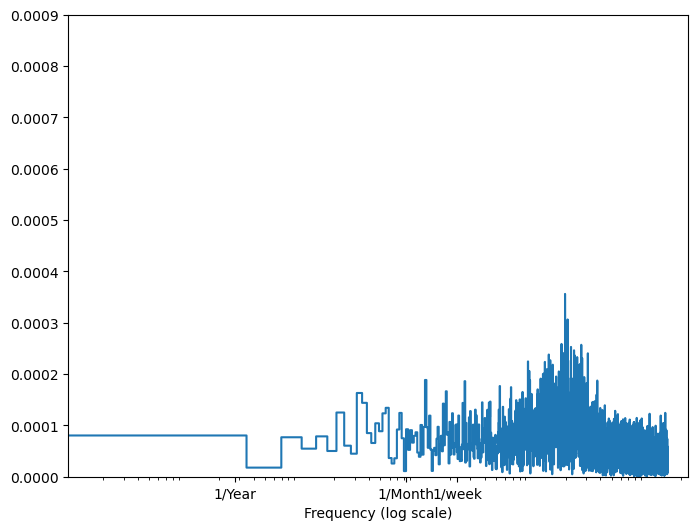

In [15]:
fft = tf.signal.rfft(df_resampled['Velocity Vector(Y)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Velocity Vector(Y)'])
days_per_year = 365.2524

years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle

plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 0.0009)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# # Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
# max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_vely = f_per_month[max_index]

print("Frequency peak: {:.2f} 1/month".format(f_peak_vely))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))

Frequency peak: 2.01 1/month


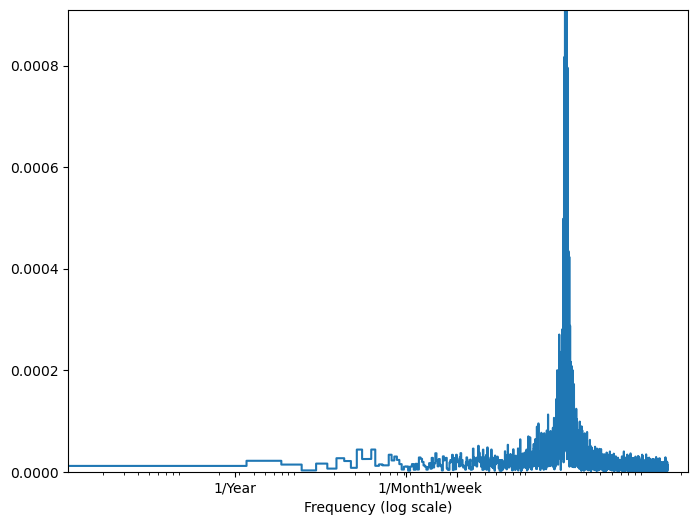

In [16]:
fft = tf.signal.rfft(df_resampled['Velocity Vector(Z)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_d = len(df_resampled['Velocity Vector(Z)'])
days_per_year = 365.2524

years_per_dataset = n_samples_d / days_per_year
f_per_year = f_per_dataset / years_per_dataset
f_per_month = f_per_year / 12  # divide by 12 to get per month cycle

plt.step(f_per_month, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 0.00091)
plt.xlim([0.0001, max(plt.xlim())])
plt.xticks([1/4.3482,1/12, 1/365.2524], labels=['1/week','1/Month', '1/Year'])
_ = plt.xlabel('Frequency (log scale)')

# # Get the indices of the three largest FFT coefficients
# top_three_indices = np.argsort(np.abs(fft))[-3:]

# # Print the indices and corresponding frequencies
# for i in top_three_indices:
#     f_peak = f_per_month[i]
#     print("Index {}: Frequency {:.2f} 1/month".format(i, f_peak))
max_index = np.argmax(np.abs(fft))

# Get the corresponding frequency value at the peak index
f_peak_velz = f_per_month[max_index]

print("Frequency peak: {:.2f} 1/month".format(f_peak_velz))

# f_peak2 = f_per_year[max_index]

# print("Frequency peak: {:.2f} 1/year".format(f_peak2))

# f_peak3 = f_per_week[max_index]

# print("Frequency peak: {:.2f} 1/week".format(f_peak3))


Text(0.5, 1.0, 'Time of Month signal')

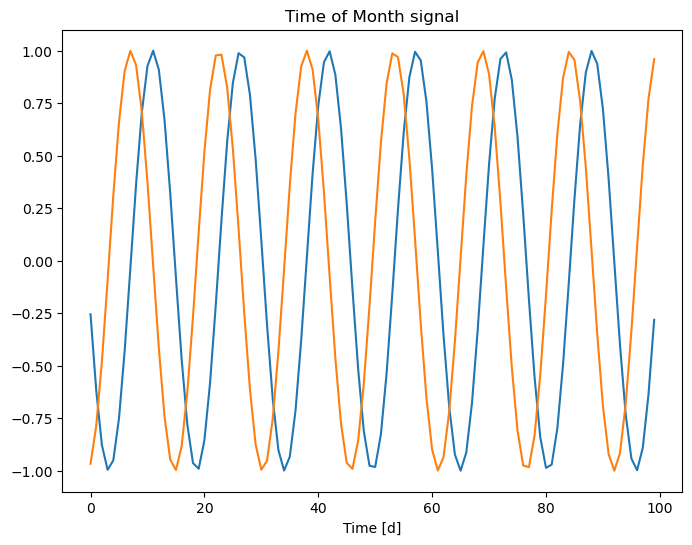

In [17]:
#Frequency of Position vector x
# Calculate frequency in 1/second
freq_per_sec = f_peak_posx / (30.44 * 24 * 60 * 60)
df_resampled['position_x_sine_wave'] = np.sin(2 * np.pi * freq_per_sec * timestamp_s)
df_resampled['position_x_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['position_x_sine_wave'])[:100])
plt.plot(np.array(df_resampled['position_x_cosine_wave'])[:100])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

Text(0.5, 1.0, 'Time of Month signal')

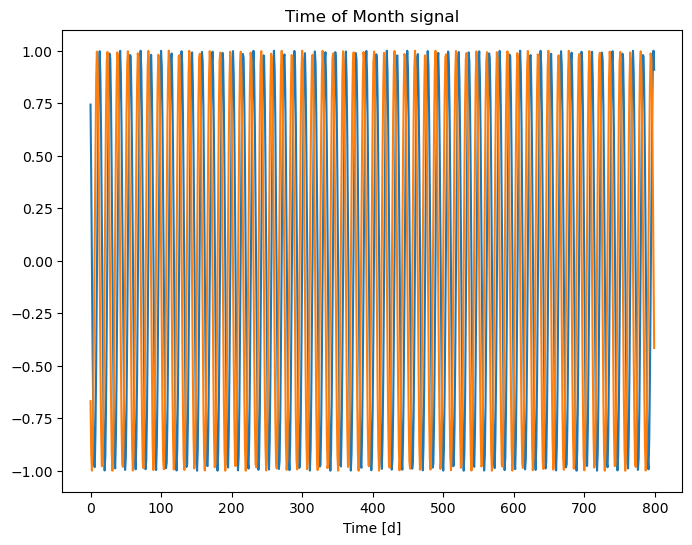

In [18]:
#Frequency of Position vector y
# Calculate frequency in 1/second
freq_per_sec1 = f_peak_posy / (30.44 * 24 * 60 * 60)
df_resampled['position_y_sine_wave'] = np.sin(2 * np.pi * freq_per_sec1 * timestamp_s)
df_resampled['position_y_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec1 * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['position_y_sine_wave'])[:800])
plt.plot(np.array(df_resampled['position_y_cosine_wave'])[:800])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

Text(0.5, 1.0, 'Time of Month signal')

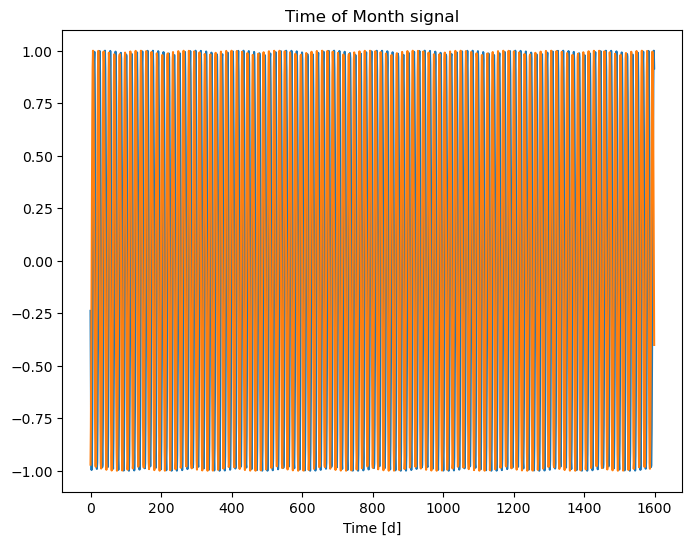

In [19]:
#Frequency of Position vector z
# Calculate frequency in 1/second
freq_per_sec2 = f_peak_posz / (30.44 * 24 * 60 * 60)
df_resampled['position_z_sine_wave'] = np.sin(2 * np.pi * freq_per_sec2 * timestamp_s)
df_resampled['position_z_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec2 * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['position_z_sine_wave'])[:1600])
plt.plot(np.array(df_resampled['position_z_cosine_wave'])[:1600])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

Text(0.5, 1.0, 'Time of Month signal')

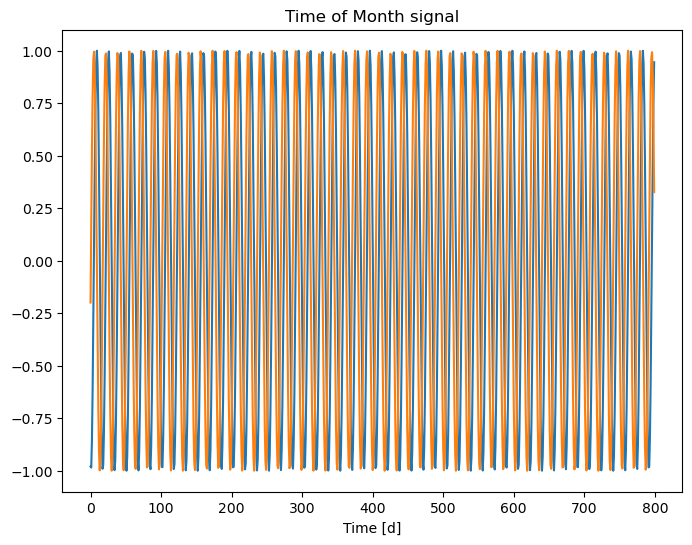

In [20]:
#Frequency of velocity vector X
# Calculate frequency in 1/second
freq_per_sec3 = f_peak_velx / (30.44 * 24 * 60 * 60)
df_resampled['velocity_x_sine_wave'] = np.sin(2 * np.pi * freq_per_sec3 * timestamp_s)
df_resampled['velocity_x_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec3 * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['velocity_x_sine_wave'])[:800])
plt.plot(np.array(df_resampled['velocity_x_cosine_wave'])[:800])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

Text(0.5, 1.0, 'Time of Month signal')

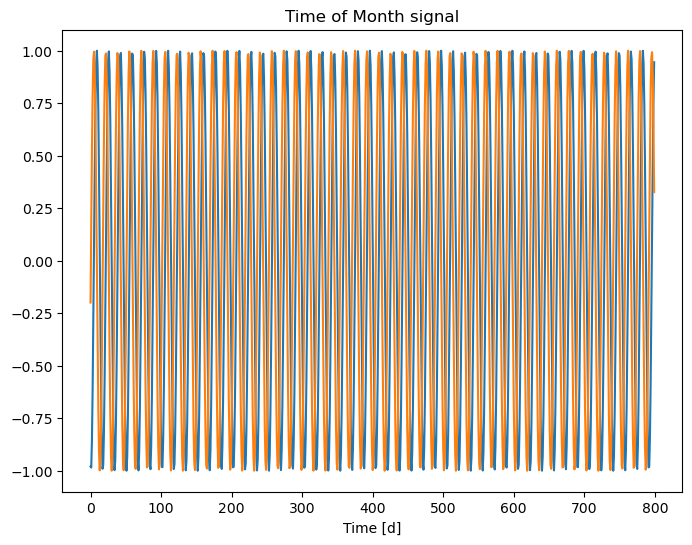

In [21]:
#Frequency of Velocity vector y
# Calculate frequency in 1/second
freq_per_sec4 = f_peak_vely / (30.44 * 24 * 60 * 60)
df_resampled['velocity_y_sine_wave'] = np.sin(2 * np.pi * freq_per_sec4 * timestamp_s)
df_resampled['velocity_y_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec4 * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['velocity_y_sine_wave'])[:800])
plt.plot(np.array(df_resampled['velocity_y_cosine_wave'])[:800])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

Text(0.5, 1.0, 'Time of Month signal')

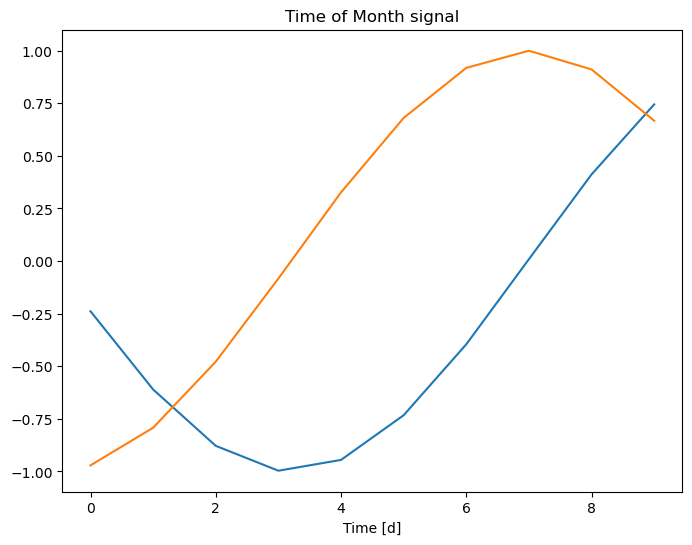

In [22]:
#Frequency of Velocity vector z
# Calculate frequency in 1/second
freq_per_sec5 = f_peak_velz / (30.44 * 24 * 60 * 60)
df_resampled['velocity_z_sine_wave'] = np.sin(2 * np.pi * freq_per_sec5 * timestamp_s)
df_resampled['velocity_z_cosine_wave'] = np.cos(2 * np.pi * freq_per_sec5 * timestamp_s)

#Plot

plt.plot(np.array(df_resampled['velocity_z_sine_wave'])[:10])
plt.plot(np.array(df_resampled['velocity_z_cosine_wave'])[:10])
plt.xlabel('Time [d]')
plt.title('Time of Month signal')

In [23]:

df_resampled.head()
df_resampled.to_csv('vanguard.csv')


In [24]:
#Normalize data
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))
X1 = np.array(df_resampled)
X_scale = min_max_scaler.fit_transform(X1[:, [1, 2, 3, 4, 5, 6]])
X_scale1 = np.concatenate((X1[:, [0,7,8,9,10,11,12,13,14,15,16,17,18]], X_scale), axis=1)

df_resampled_normalized = pd.DataFrame(X_scale1, columns=['Resampled_Index','position_x_sine_wave','position_x_cosine_wave','position_y_sine_wave','position_y_cosine_wave','position_z_sine_wave','position_z_cosine_wave','velocity_x_sine_wave','velocity_x_cosine_wave','velocity_y_sine_wave','velocity_y_cosine_wave','velocity_z_sine_wave','velocity_z_cosine_wave','Position Vector(X)', 'Position Vector(Y)','Position Vector(Z)','Velocity Vector(X)','Velocity Vector(Y)', 'Velocity Vector(Z)'])
df_resampled_normalized.index=df_resampled.index
df_resampled_normalized.head()


,Resampled_Index,position_x_sine_wave,position_x_cosine_wave,position_y_sine_wave,position_y_cosine_wave,position_z_sine_wave,position_z_cosine_wave,velocity_x_sine_wave,velocity_x_cosine_wave,velocity_y_sine_wave,velocity_y_cosine_wave,velocity_z_sine_wave,velocity_z_cosine_wave,Position Vector(X),Position Vector(Y),Position Vector(Z),Velocity Vector(X),Velocity Vector(Y),Velocity Vector(Z)
epoch,,,,,,,,,,,,,,,,,,,
1998-01-01,0.0,-0.254867,-0.966976,0.743397,-0.668850,-0.238704,-0.971092,-0.979955,-0.199220,-0.979955,-0.199220,-0.238704,-0.971092,0.074463,-0.336016,0.938286,0.183894,-0.810099,-0.291015
1998-01-02,1.0,-0.616868,-0.787067,0.394944,-0.918705,-0.610488,-0.792025,-0.985107,0.171945,-0.985107,0.171945,-0.610488,-0.792025,-0.591520,0.427889,0.684320,-0.496834,0.326404,-0.618844
1998-01-03,2.5,-0.878065,-0.478541,-0.026119,-0.999659,-0.878314,-0.478085,-0.854521,0.519417,-0.854521,0.519417,-0.878314,-0.478085,0.610163,-0.622133,0.253694,0.110463,-0.182723,-0.822229
1998-01-04,4.0,-0.995776,-0.091816,-0.442380,-0.896827,-0.996572,-0.082732,-0.606191,0.795319,-0.606191,0.795319,-0.996572,-0.082732,0.841198,0.536150,-0.062808,-0.059299,-0.043842,-0.854095
1998-01-05,5.0,-0.950765,0.309912,-0.777311,-0.629117,-0.945125,0.326710,-0.274334,0.961634,-0.274334,0.961634,-0.945125,0.326710,-0.842137,-0.251300,-0.479632,0.397476,0.097735,-0.755121


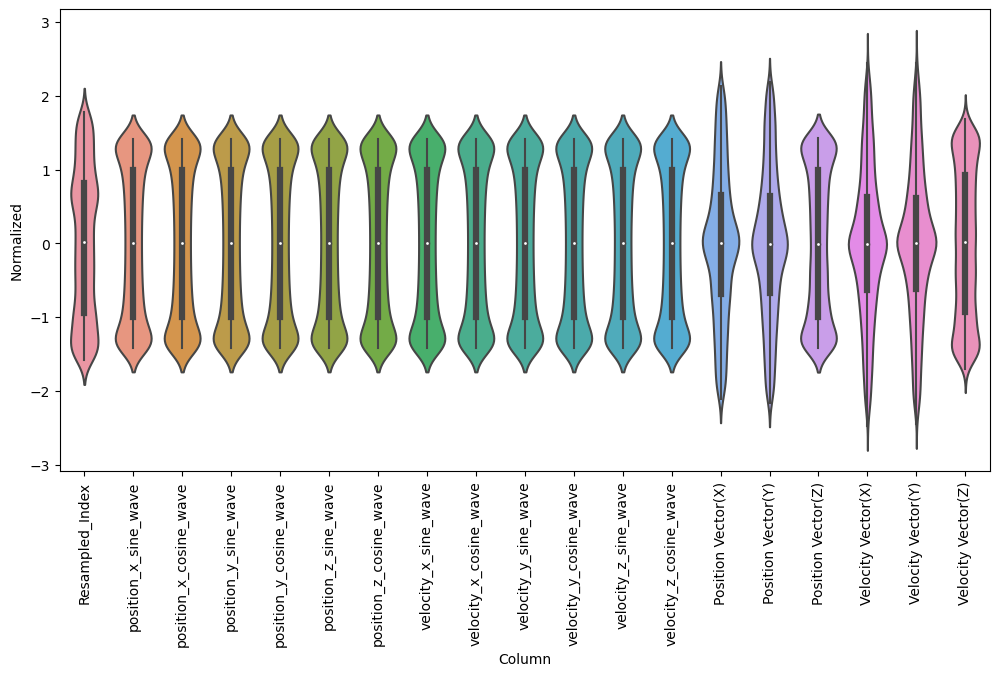

In [25]:
df_std = (df_resampled_normalized - df_resampled_normalized.mean()) / (df_resampled_normalized.std())
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df_resampled_normalized.keys(), rotation=90)

In [26]:
df_resampled_normalized.to_csv('VanguardNormalized.csv')